# Week 6 Seminar Answers

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

## Question 1

In [2]:
data = yf.download("AMZN TSLA", start="2023-02-28", end="2024-02-28")

[*********************100%%**********************]  2 of 2 completed


In [3]:
data.tail()

Adj Close                   Close                    High  \
                  AMZN        TSLA        AMZN        TSLA        AMZN   
Date                                                                     
2024-02-21  168.589996  194.770004  168.589996  194.770004  170.229996   
2024-02-22  174.580002  197.410004  174.580002  197.410004  174.800003   
2024-02-23  174.990005  191.970001  174.990005  191.970001  175.750000   
2024-02-26  174.729996  199.399994  174.729996  199.399994  176.369995   
2024-02-27  173.539993  199.729996  173.539993  199.729996  174.619995   

                               Low                    Open              \
                  TSLA        AMZN        TSLA        AMZN        TSLA   
Date                                                                     
2024-02-21  199.440002  167.139999  191.949997  168.940002  193.360001   
2024-02-22  198.320007  171.770004  191.360001  173.100006  194.000000   
2024-02-23  197.570007  173.699997  191.500000  174.279999  195.309998   
2024-02-26  201.779999  174.259995  192.000000  175.699997  192.289993   
2024-02-27  205.600006  172.860001  198.259995  174.080002  204.039993   

              Volume             
                AMZN       TSLA  
Date                             
2024-02-21  44575600  103844000  
2024-02-22  55392400   92739500  
2024-02-23  59662900   78670300  
2024-02-26  44368600  111747100  
2024-02-27  31141700  108645400

## Question 2

In [4]:
ADJ =  data['Adj Close']
ADJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-02-28 to 2024-02-27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    251 non-null    float64
 1   TSLA    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

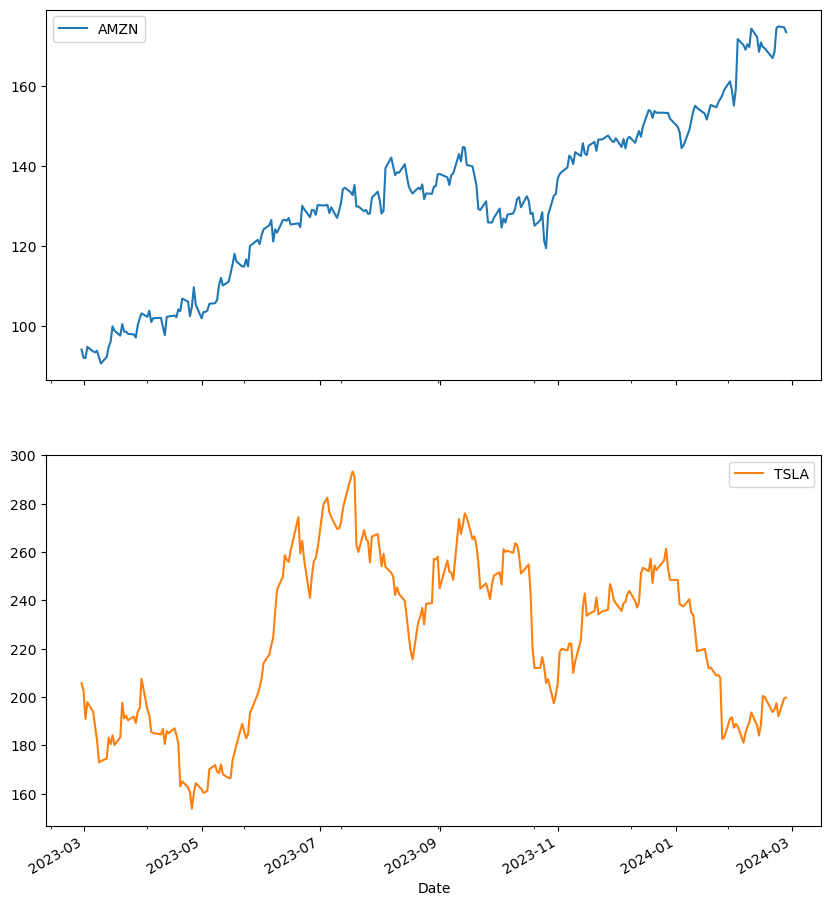

In [5]:
ADJ.plot(figsize=(10, 12), subplots=True)

## Question 3

In [6]:
ADJ.describe().round(2)

,AMZN,TSLA
count,251.00,251.00
mean,131.33,223.45
std,20.56,34.36
min,90.73,153.75
25%,119.84,191.37
50%,131.69,232.96
75%,145.52,252.86
max,174.99,293.34


In [7]:
rets = np.log(ADJ / ADJ.shift(1))
rets.head().round(4)

,AMZN,TSLA
Date,,
2023-02-28,NaN,NaN
2023-03-01,-0.0221,-0.0144
2023-03-02,-0.0004,-0.0603
2023-03-03,0.0296,0.0355
2023-03-06,-0.0122,-0.0203


## Question 4

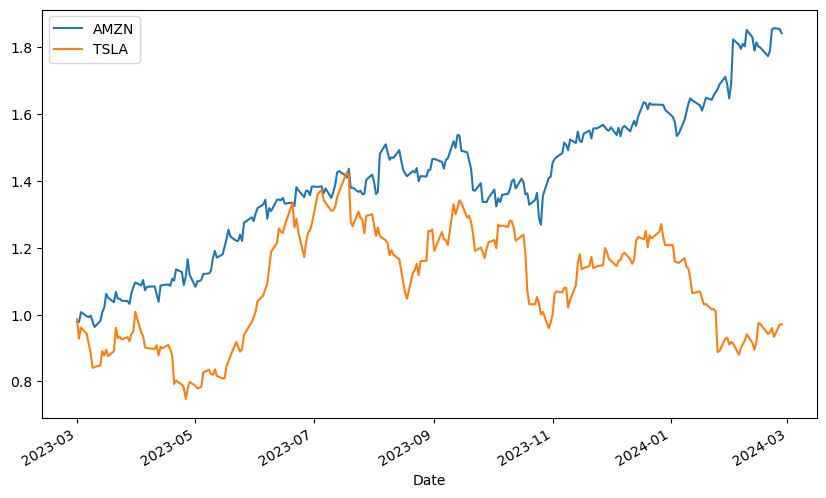

In [8]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

## Question 5

In [9]:
sym = 'AMZN'
AMZN_data = pd.DataFrame(ADJ[sym]).dropna()
AMZN_data.tail()

,AMZN
Date,
2024-02-21,168.589996
2024-02-22,174.580002
2024-02-23,174.990005
2024-02-26,174.729996
2024-02-27,173.539993


In [10]:
AMZN_data['SMA1'] = ADJ[sym].rolling(window=20).mean()
AMZN_data['SMA2'] = ADJ[sym].rolling(window=60).mean()
AMZN_data[[sym, 'SMA1', 'SMA2']].tail()

,AMZN,SMA1,SMA2
Date,,,
2024-02-21,168.589996,166.075497,155.476999
2024-02-22,174.580002,166.960998,155.940999
2024-02-23,174.990005,167.822998,156.395333
2024-02-26,174.729996,168.603498,156.856999
2024-02-27,173.539993,169.217498,157.310666


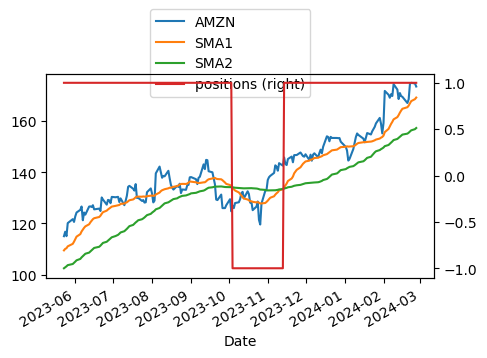

In [12]:
AMZN_data.dropna(inplace=True)
AMZN_data['positions'] = np.where(AMZN_data['SMA1'] > AMZN_data['SMA2'],1,-1)
ax = AMZN_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(5, 3),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## Question 6

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

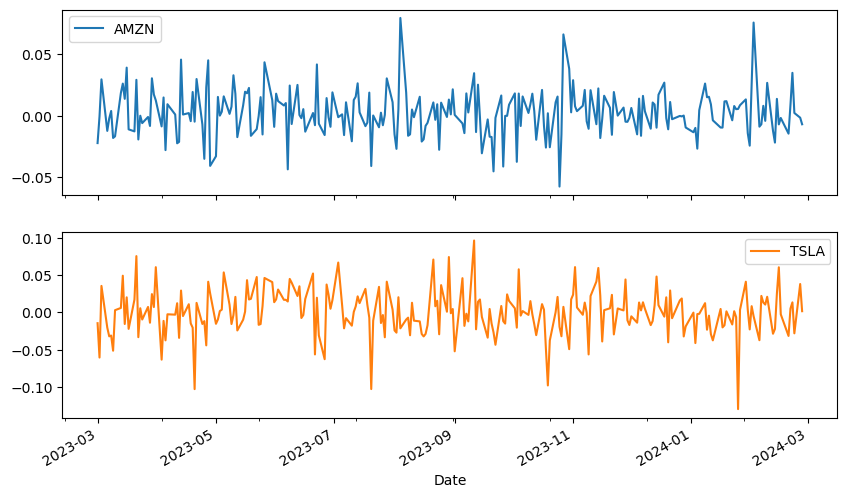

In [13]:
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6))

array([[<Axes: xlabel='AMZN', ylabel='AMZN'>,
        <Axes: xlabel='TSLA', ylabel='AMZN'>],
       [<Axes: xlabel='AMZN', ylabel='TSLA'>,
        <Axes: xlabel='TSLA', ylabel='TSLA'>]], dtype=object)

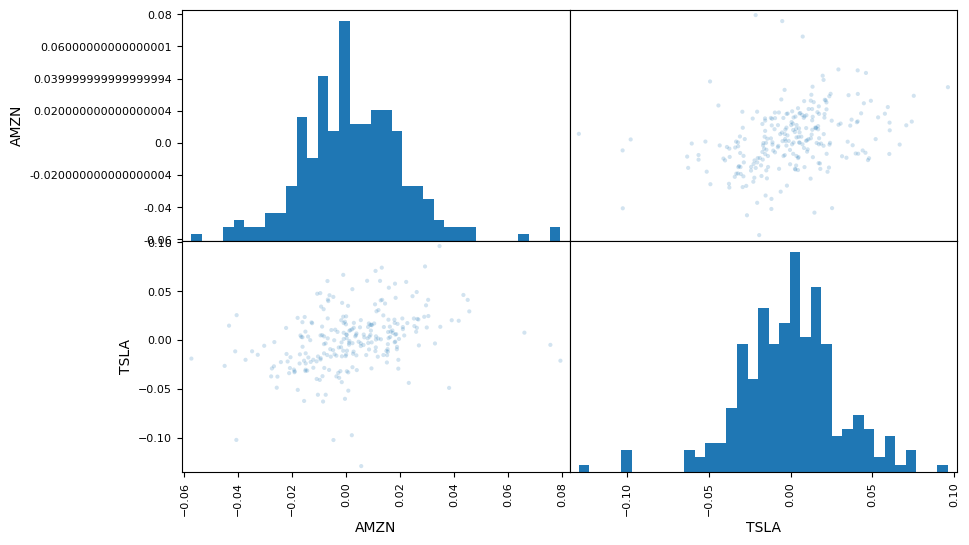

In [14]:
pd.plotting.scatter_matrix(rets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

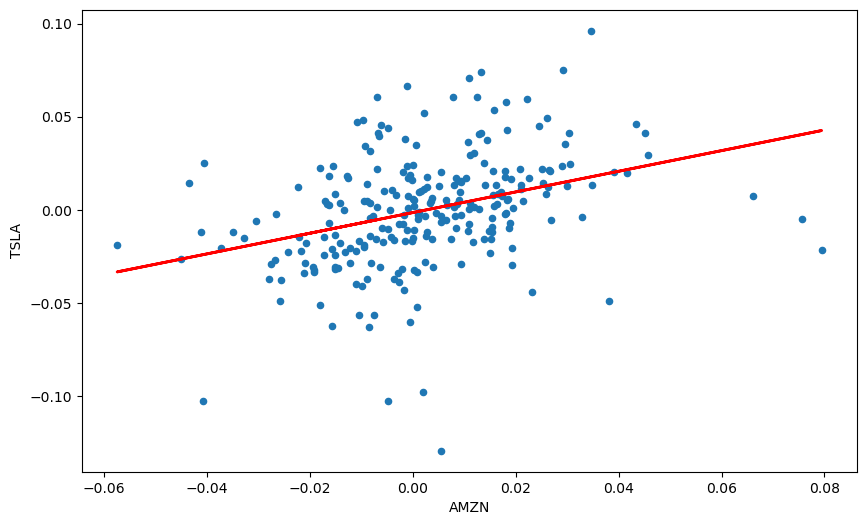

In [15]:
reg = np.polyfit(rets['AMZN'], rets['TSLA'], deg=1)
ax = rets.plot(kind='scatter', x='AMZN', y='TSLA', figsize=(10, 6))
ax.plot(rets['AMZN'], np.polyval(reg, rets['AMZN']), 'r', lw=2);

In [16]:
rets.corr()

,AMZN,TSLA
AMZN,1.000000,0.346221
TSLA,0.346221,1.000000


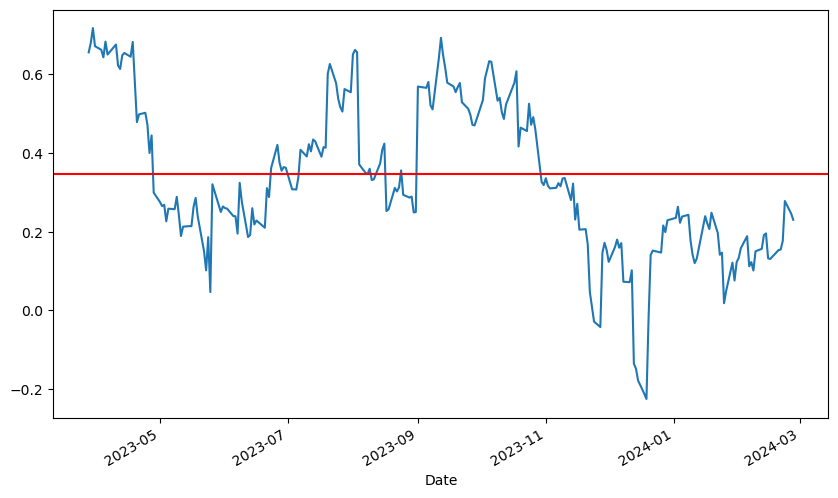

In [17]:
ax = rets['AMZN'].rolling(window=20).corr(rets['TSLA']).plot(figsize=(10, 6)) 
ax.axhline(rets.corr().iloc[0, 1], c='r');